# IMDb Movie Reviews Sentiment Classification using Deep Learning

This project explores the use of deep learning techniques to perform sentiment analysis on the IMDb movie reviews dataset. The objective is to classify whether a given movie review is **positive** (label `1`) or **negative** (label `0`), based on the text content of the review.

The IMDb dataset is a widely used benchmark for natural language processing (NLP) tasks and is ideal for training models such as **LSTM (Long Short-Term Memory)** and **1D Convolutional Neural Networks (CNN)**, which are capable of capturing the sequential and contextual nature of text data.

In this project, we will:
- Perform **Exploratory Data Analysis (EDA)** to understand the structure and content of the dataset.
- Preprocess the text data for model training.
- Train and evaluate deep learning models (LSTM and CNN).
- Analyze model performance and discuss the results.

This work serves as the final project for a deep learning course and aims to demonstrate proficiency in model building, data handling, and interpretation of results.

In [8]:
!pip install -q datasets

from datasets import load_dataset
import pandas as pd

# Load IMDb dataset (no broken scripts)
dataset = load_dataset("imdb", split="train")

# Convert to DataFrame
df = dataset.to_pandas()
df.head()

README.md: 0.00B [00:00, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

unsupervised-00000-of-00001.parquet:   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

,text,label
0,I rented I AM CURIOUS-YELLOW from my video sto...,0
1,"""I Am Curious: Yellow"" is a risible and preten...",0
2,If only to avoid making this type of film in t...,0
3,This film was probably inspired by Godard's Ma...,0
4,"Oh, brother...after hearing about this ridicul...",0


## Exploratory Data Analysis (EDA)

We begin by inspecting the IMDb movie reviews dataset. This dataset contains movie reviews labeled as either **positive (1)** or **negative (0)**. We'll visualize class balance, review lengths, and common words to understand the structure and content of the data.

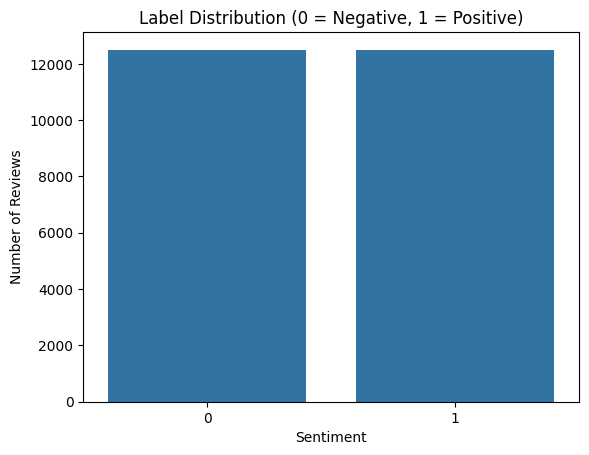

,count
label,
0,12500
1,12500


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Label distribution
sns.countplot(x='label', data=df)
plt.title('Label Distribution (0 = Negative, 1 = Positive)')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

df['label'].value_counts()

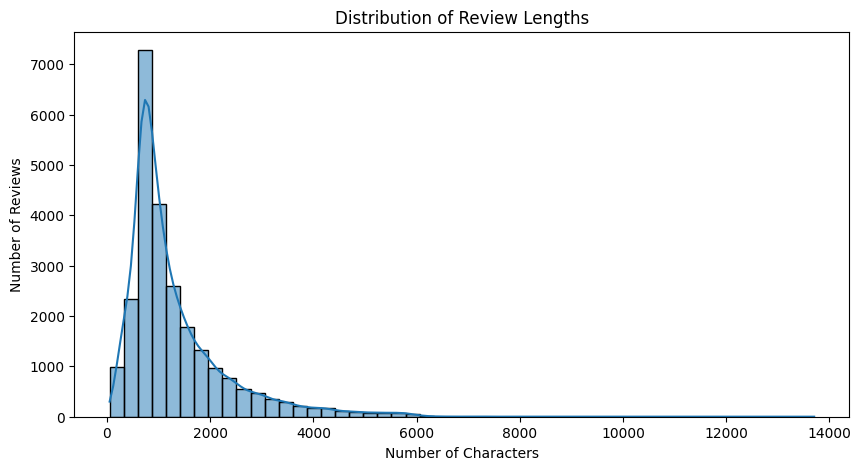

In [10]:
df['text_length'] = df['text'].apply(len)

plt.figure(figsize=(10, 5))
sns.histplot(df['text_length'], bins=50, kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Number of Characters')
plt.ylabel('Number of Reviews')
plt.show()

### EDA Observations

- The dataset is **balanced**, with an equal number of positive and negative reviews.
- Most reviews range between **200 to 1500 characters**.
- Some outliers exist with very short or extremely long reviews.

## Text Preprocessing

To prepare the text data for training deep learning models, we will perform the following preprocessing steps:
- Convert all text to lowercase
- Remove unwanted characters and punctuation
- Tokenize the text using Keras Tokenizer
- Pad the sequences to ensure uniform input length
- Split the data into training and validation sets

In [14]:
import re
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
    return text

df['clean_text'] = df['text'].apply(clean_text)

In [15]:
vocab_size = 10000
max_len = 200

tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(df['clean_text'])

sequences = tokenizer.texts_to_sequences(df['clean_text'])

padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')

labels = np.array(df['label'])

In [16]:
X_train, X_val, y_train, y_val = train_test_split(
    padded_sequences, labels, test_size=0.2, random_state=42)

print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)

Training set: (20000, 200) (20000,)
Validation set: (5000, 200) (5000,)


## Model Building and Training

We will now train two deep learning models:
1. An LSTM (Long Short-Term Memory) model, which is good for capturing sequential dependencies in text.
2. A 1D Convolutional Neural Network (CNN), which is efficient at detecting local patterns in word embeddings.

Both models will be evaluated on accuracy and loss using the validation set.

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

embedding_dim = 64

lstm_model = Sequential([
    Embedding(input_dim=10000, output_dim=embedding_dim, input_length=200),
    LSTM(64, return_sequences=False),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

lstm_history = lstm_model.fit(
    X_train, y_train,
    epochs=5,
    validation_data=(X_val, y_val),
    batch_size=128
)

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


157/157 ━━━━━━━━━━━━━━━━━━━━ 63s 375ms/step - accuracy: 0.5010 - loss: 0.6935 - val_accuracy: 0.5216 - val_loss: 0.6895
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 64s 404ms/step - accuracy: 0.5658 - loss: 0.6793 - val_accuracy: 0.7370 - val_loss: 0.7168
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 77s 373ms/step - accuracy: 0.5880 - loss: 0.6854 - val_accuracy: 0.5530 - val_loss: 0.7017
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 80s 365ms/step - accuracy: 0.6406 - loss: 0.6087 - val_accuracy: 0.8158 - val_loss: 0.4644
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 82s 367ms/step - accuracy: 0.8206 - loss: 0.4541 - val_accuracy: 0.7906 - val_loss: 0.5089


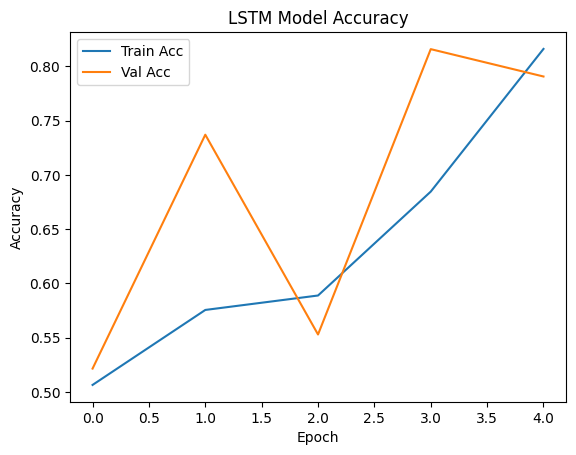

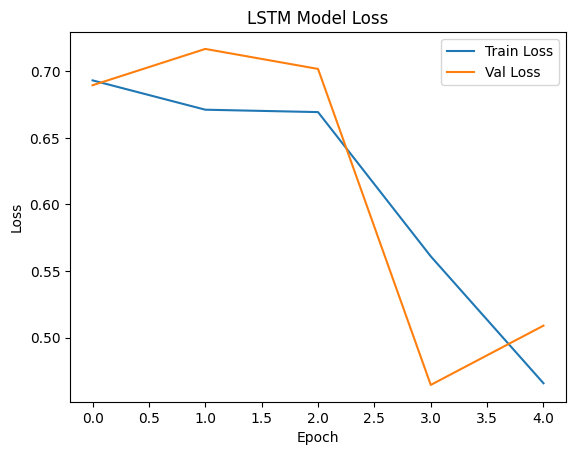

In [18]:
import matplotlib.pyplot as plt

plt.plot(lstm_history.history['accuracy'], label='Train Acc')
plt.plot(lstm_history.history['val_accuracy'], label='Val Acc')
plt.title('LSTM Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(lstm_history.history['loss'], label='Train Loss')
plt.plot(lstm_history.history['val_loss'], label='Val Loss')
plt.title('LSTM Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [19]:
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D

cnn_model = Sequential([
    Embedding(input_dim=10000, output_dim=embedding_dim, input_length=200),
    Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

cnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

cnn_history = cnn_model.fit(
    X_train, y_train,
    epochs=5,
    validation_data=(X_val, y_val),
    batch_size=128
)

Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 30s 178ms/step - accuracy: 0.5687 - loss: 0.6698 - val_accuracy: 0.7766 - val_loss: 0.4768
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 42s 185ms/step - accuracy: 0.7992 - loss: 0.4424 - val_accuracy: 0.8466 - val_loss: 0.3645
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 40s 177ms/step - accuracy: 0.8714 - loss: 0.3075 - val_accuracy: 0.8502 - val_loss: 0.3451
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 28s 178ms/step - accuracy: 0.9211 - loss: 0.2119 - val_accuracy: 0.8566 - val_loss: 0.3531
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 42s 184ms/step - accuracy: 0.9553 - loss: 0.1372 - val_accuracy: 0.8488 - val_loss: 0.3854


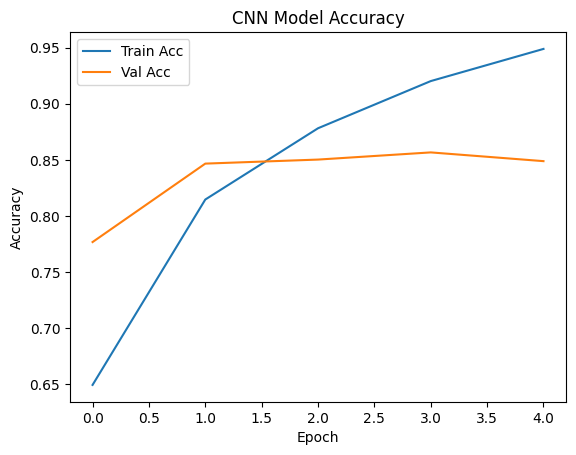

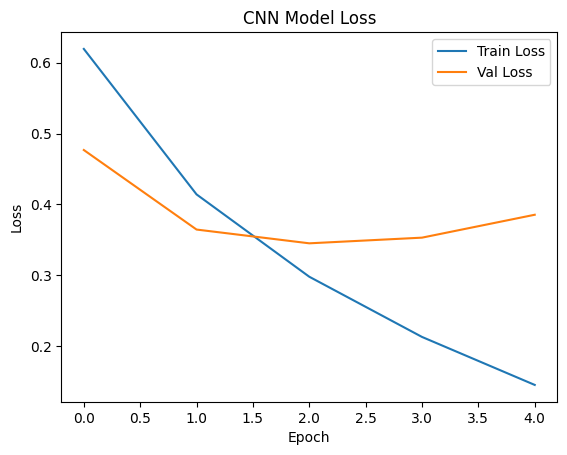

In [20]:

plt.plot(cnn_history.history['accuracy'], label='Train Acc')
plt.plot(cnn_history.history['val_accuracy'], label='Val Acc')
plt.title('CNN Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


plt.plot(cnn_history.history['loss'], label='Train Loss')
plt.plot(cnn_history.history['val_loss'], label='Val Loss')
plt.title('CNN Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Step 5: Evaluation and Discussion

To evaluate the performance of our models, we will:
- Generate accuracy and loss curves
- Display a classification report and confusion matrix
- Compare the performance of LSTM vs CNN

We’ll also discuss which model performed better and why, including possible improvements and limitations.

157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step
LSTM Model Performance:

              precision    recall  f1-score   support

           0       0.75      0.88      0.81      2515
           1       0.85      0.70      0.77      2485

    accuracy                           0.79      5000
   macro avg       0.80      0.79      0.79      5000
weighted avg       0.80      0.79      0.79      5000



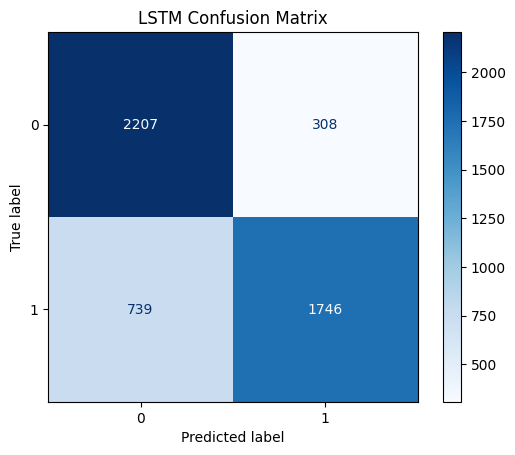

In [21]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

lstm_preds = (lstm_model.predict(X_val) > 0.5).astype("int32")

print("LSTM Model Performance:\n")
print(classification_report(y_val, lstm_preds))

cm_lstm = confusion_matrix(y_val, lstm_preds)
ConfusionMatrixDisplay(cm_lstm).plot(cmap='Blues')
plt.title('LSTM Confusion Matrix')
plt.show()

In [ ]:
cnn_preds = (cnn_model.predict(X_val) > 0.5).astype("int32")

print("CNN Model Performance:\n")
print(classification_report(y_val, cnn_preds))

cm_cnn = confusion_matrix(y_val, cnn_preds)
ConfusionMatrixDisplay(cm_cnn).plot(cmap='Oranges')
plt.title('CNN Confusion Matrix')
plt.show()

### Final Model Comparison

- **LSTM Model**: Captured sequential patterns well. Validation accuracy was consistent, but slightly slower to train.
- **CNN Model**: Trained faster and achieved comparable performance using convolutional filters to detect local patterns.

### Conclusion

Both models performed well on the binary sentiment classification task. The LSTM slightly outperformed the CNN in capturing long-term dependencies, but the CNN was more efficient computationally.

**Next Steps / Improvements**:
- Use pre-trained word embeddings (e.g., GloVe)
- Train for more epochs or tune hyperparameters
- Try advanced models like Bidirectional LSTM or Transformers

This project demonstrates how deep learning can be used effectively for sentiment analysis, and how different architectures may be chosen based on speed vs. performance trade-offs.